In [1]:
# Import statements

import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import tweepy

%matplotlib inline

# Gather

In [2]:
# Load the enhanced twitter archive file we were given

twitter_en = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
# Scrape the image predictions file from the Udacity website

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [4]:
# Load the image predictions file

images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [5]:
# Setting up the Twitter API with authentication pieces

consumer_key = '*****'
consumer_secret = '*****'
access_token = '****'
access_secret = '****'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
import time

In [9]:
# Query Twitter's API for JSON data - match to each Tweet ID from the archive

# this starts the timer

start = time.time()

tweet_ids = twitter_en.tweet_id.values

tweets_data = []
tweet_success = []
tweet_failure = []

for tweet_id in tweet_ids:
        try:
            data = api.get_status(tweet_id, tweet_mode='extended', 
                                  wait_on_rate_limit = True, 
                                  wait_on_rate_limit_notify = True)
            tweets_data.append(data)
            tweet_success.append(tweet_id)
        except:
            tweet_failure.append(tweet_id)
            print(tweet_id)

# this stops the timer            
end = time.time()

print(end - start)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096
754011816964026368
680055455951884288
4509.512809991837


In [12]:
# Write tweet data to json file

with open('tweets_json.txt', mode = 'w') as file:
    json.dump(tweets_data, file)

In [15]:
# Loading the Twitter API data

twitter_counts_df = pd.read_json('tweets_json.txt')
twitter_counts_df['tweet_id'] = tweet_success
twitter_counts_df = twitter_counts_df[['tweet_id', 'favorite_count', 'retweet_count']]

# Assess

In [17]:
twitter_en.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
840,767122157629476866,NaN,NaN,2016-08-20 22:12:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rupert. You betrayed him with bath tim...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/767122157...,13,10,Rupert,None,None,None,None
367,828770345708580865,NaN,NaN,2017-02-07 01:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's your Lyft for tonight. Kin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828770345...,13,10,Alfie,None,None,None,None
1625,684830982659280897,NaN,NaN,2016-01-06 20:16:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This little fella really hates stairs. Prefers...,NaN,NaN,NaN,https://vine.co/v/eEZXZI1rqxX,13,10,None,None,None,pupper,None
1825,676470639084101634,NaN,NaN,2015-12-14 18:35:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Three generations of pupper. 11/10 for all htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676470639...,11,10,None,None,None,pupper,None
1311,707021089608753152,NaN,NaN,2016-03-08 01:52:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's a Dasani Episcopalian. Go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707021089...,12,10,Tucker,None,None,None,None


In [18]:
twitter_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
twitter_en['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64

In [20]:
twitter_en['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
twitter_en['text'].value_counts()

Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk                                                                                    1
RT @dog_rates: This is Harper. She scraped her elbow attempting a backflip off a tree. Valiant effort tho. 12/10 https://t.co/oHKJHghrp5                              1
This is Finn. He's very nervous for the game. Has a lot of money riding on it.10/10 would attempt to comfort https://t.co/CbtNfecWiT                                  1
I'll name the dogs from now on. This is Kreggory. He does parkour. 10/10 https://t.co/uPqPeXAcua                                                                      1
This is Albert AKA King Banana Peel. He's a kind ruler of the kitchen. Very jubilant pupper. 10/10 overall great dog https://t.co/PN8hxgZ9We                          1
                                                                                                                                                                

In [22]:
twitter_en['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [23]:
twitter_en['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [24]:
twitter_en['retweeted_status_timestamp'].value_counts()

2016-09-09 18:31:54 +0000    1
2016-09-14 17:40:06 +0000    1
2016-11-09 00:37:46 +0000    1
2016-10-26 22:31:36 +0000    1
2016-07-25 15:23:28 +0000    1
                            ..
2016-08-15 16:22:20 +0000    1
2017-05-02 00:04:57 +0000    1
2016-03-20 23:23:54 +0000    1
2016-10-01 19:47:08 +0000    1
2015-11-19 03:29:07 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [25]:
twitter_en['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/687317306314240000/photo/1,https://twitter.com/dog_rates/status/687317306314240000/photo/1    2
https://twitter.com/dog_rates/status/704761120771465216/photo/1,https://twitter.com/dog_rates/status/704761120771465216/photo/1    2
https://twitter.com/dog_rates/status/679462823135686656/photo/1                                                                    2
https://twitter.com/dog_rates/status/829501995190984704/photo/1,https://twitter.com/dog_rates/status/829501995190984704/photo/1    2
https://vine.co/v/ea0OwvPTx9l                                                                                                      2
                                                                                                                                  ..
https://twitter.com/dog_rates/status/675501075957489664/photo/1                                                                    1
https://twitter.com/dog_rates/status/732726085725589504/photo/1      

In [26]:
twitter_en['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [27]:
twitter_en['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
twitter_en['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Fabio        1
Tayzie       1
Severus      1
Pippin       1
Sully        1
Name: name, Length: 957, dtype: int64

In [29]:
twitter_en['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [30]:
twitter_en['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [31]:
twitter_en['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [32]:
twitter_en['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [33]:
sum(twitter_en['tweet_id'].duplicated())

0

In [35]:
twitter_counts_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36390,7743
1,892177421306343426,31340,5732
2,891815181378084864,23612,3794
3,891689557279858688,39687,7907
4,891327558926688256,37887,8530


In [36]:
twitter_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [37]:
twitter_counts_df['tweet_id'].value_counts()

749075273010798592    1
671163268581498880    1
743510151680958465    1
798644042770751489    1
825120256414846976    1
                     ..
794926597468000259    1
673705679337693185    1
673342308415348736    1
754482103782404096    1
700151421916807169    1
Name: tweet_id, Length: 2331, dtype: int64

In [38]:
twitter_counts_df['favorite_count'].value_counts()

0        163
1400       4
4948       3
2587       3
3333       3
        ... 
599        1
4699       1
2652       1
21085      1
10248      1
Name: favorite_count, Length: 2001, dtype: int64

In [39]:
twitter_counts_df['retweet_count'].value_counts()

42      5
227     5
62      4
523     4
556     4
       ..
2002    1
1243    1
2012    1
2018    1
2047    1
Name: retweet_count, Length: 1703, dtype: int64

In [41]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [42]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [43]:
images['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
                     ..
816829038950027264    1
847971574464610304    1
713175907180089344    1
670338931251150849    1
700151421916807169    1
Name: tweet_id, Length: 2075, dtype: int64

In [44]:
images['jpg_url'].value_counts()

https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg    2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg    2
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg    2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg    2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg    2
                                                  ..
https://pbs.twimg.com/media/CXvlQ2zW8AAE0tp.jpg    1
https://pbs.twimg.com/media/CVHMyHMWwAALYXs.jpg    1
https://pbs.twimg.com/media/CbC6JL_WEAI_PhH.jpg    1
https://pbs.twimg.com/media/CWjQm5gXAAA9GkD.jpg    1
https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [45]:
images['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [46]:
images['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
rain_barrel             1
maillot                 1
swab                    1
bakery                  1
tiger_shark             1
Name: p1, Length: 378, dtype: int64

In [47]:
images['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
           ..
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [48]:
images['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [49]:
images['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
cannon                  1
maillot                 1
tarantula               1
coral_reef              1
dugong                  1
Name: p2, Length: 405, dtype: int64

In [50]:
images['p2_conf'].value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
           ..
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [51]:
images['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [52]:
images['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
grocery_store          1
dugong                 1
maze                   1
spatula                1
affenpinscher          1
Name: p3, Length: 408, dtype: int64

In [53]:
images['p3_conf'].value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
           ..
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [54]:
images['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

# Cleaning

In [55]:
# Make a copy of the cells before cleaning

twitter_en = twitter_en.copy()
twitter_counts_df = twitter_counts_df.copy()
images = images.copy()

# Tidiness Issue#

**DEFINE**

>1) The data from the twitter_counts_df and images should be linked/merged with the original twitter_en data frame

**Code**

In [56]:
from functools import reduce

In [57]:
dfs = [twitter_en, twitter_counts_df, images]
twitter_cmb = reduce(lambda left, right: pd.merge(left, right, on = 'tweet_id'), dfs)

In [58]:
twitter_cmb.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


**Test**

In [59]:
twitter_cmb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

**DEFINE**

>2) There are 4 different categories, turned into colums for the type of dogs. Instead we can put them under a single column named twitter_dog_stages. Having NaN in the dogs column dosen't look good. Hence change that to None if there are no information on the type of dogs. 

**Code**

In [60]:
twitter_cmb['twitter_dog_stages'] = twitter_cmb['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [62]:
#Checking

twitter_cmb[['twitter_dog_stages','doggo', 'floofer', 'pupper', 'puppo']].head()

,twitter_dog_stages,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None


In [63]:
twitter_cmb = twitter_cmb.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [64]:
#Checking

twitter_cmb.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,twitter_dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [65]:
twitter_cmb['twitter_dog_stages'].fillna(value='None', inplace=True)

In [66]:
# Checking

twitter_cmb.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,twitter_dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


**Test**

In [67]:
twitter_cmb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  favorite_count              2059 

# Quality Issue#

**DEFINE**

>1) We won't be requiring the retweets and some unwanted columns. Hence delete it. 

**Code**

In [69]:
twitter_cmb.drop(['retweeted_status_id', 
                  'retweeted_status_user_id', 
                  'retweeted_status_timestamp',
                  'in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'source',
                  'img_num'], axis = 1, inplace=True)

**Check**

In [71]:
twitter_cmb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2059 non-null   int64  
 1   timestamp           2059 non-null   object 
 2   text                2059 non-null   object 
 3   expanded_urls       2059 non-null   object 
 4   rating_numerator    2059 non-null   int64  
 5   rating_denominator  2059 non-null   int64  
 6   name                2059 non-null   object 
 7   favorite_count      2059 non-null   int64  
 8   retweet_count       2059 non-null   int64  
 9   jpg_url             2059 non-null   object 
 10  p1                  2059 non-null   object 
 11  p1_conf             2059 non-null   float64
 12  p1_dog              2059 non-null   bool   
 13  p2                  2059 non-null   object 
 14  p2_conf             2059 non-null   float64
 15  p2_dog              2059 non-null   bool   
 16  p3    

**DEFINE**

>2) Tweet_ids should not be an integer as we won't be performing any calculation witht that. Hence we change that to string.


**Code**

In [72]:
twitter_cmb['tweet_id'] = twitter_cmb['tweet_id'].astype(str)

**Check**

In [77]:
twitter_cmb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2059 non-null   object        
 1   timestamp           2059 non-null   datetime64[ns]
 2   text                2059 non-null   object        
 3   expanded_urls       2059 non-null   object        
 4   rating_numerator    2059 non-null   int64         
 5   rating_denominator  2059 non-null   int64         
 6   name                2059 non-null   object        
 7   favorite_count      2059 non-null   int64         
 8   retweet_count       2059 non-null   int64         
 9   jpg_url             2059 non-null   object        
 10  p1                  2059 non-null   object        
 11  p1_conf             2059 non-null   float64       
 12  p1_dog              2059 non-null   bool          
 13  p2                  2059 non-null   object      

**DEFINE**

>3) We can also see timestamp as a string, I changed it to datetime format

**Code**

In [79]:
import time

In [80]:
#Already executed the below code
#twitter_cmb['timestamp'] = twitter_cmb['timestamp'].str.slice(start=0, stop=-6)

twitter_cmb['timestamp'] = pd.to_datetime(twitter_cmb['timestamp'], format = "%Y-%m-%d %H:%M:%S")

**Check**

In [81]:
twitter_cmb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2059 non-null   object        
 1   timestamp           2059 non-null   datetime64[ns]
 2   text                2059 non-null   object        
 3   expanded_urls       2059 non-null   object        
 4   rating_numerator    2059 non-null   int64         
 5   rating_denominator  2059 non-null   int64         
 6   name                2059 non-null   object        
 7   favorite_count      2059 non-null   int64         
 8   retweet_count       2059 non-null   int64         
 9   jpg_url             2059 non-null   object        
 10  p1                  2059 non-null   object        
 11  p1_conf             2059 non-null   float64       
 12  p1_dog              2059 non-null   bool          
 13  p2                  2059 non-null   object      

**DEFINE**

>4) Improving the naming problem.

**code**

In [82]:
twitter_cmb.name = twitter_cmb.name.str.replace('^[a-z]+', 'None')

**Test**

In [83]:
twitter_cmb['name'].value_counts()

None       673
Penny       10
Charlie     10
Tucker      10
Cooper      10
          ... 
Jim          1
Pablo        1
Eevee        1
Noah         1
Marvin       1
Name: name, Length: 912, dtype: int64

**DEFINE**

>5) When opened in an spreadsheet I was able to find an instance where the name was misspelled. It has to be changed. 

**code**

In [84]:
twitter_cmb['name'].replace('O', "O'Malley", inplace = True)

**Test**

In [85]:
twitter_cmb['name'].value_counts()

None       673
Penny       10
Charlie     10
Tucker      10
Cooper      10
          ... 
Jim          1
Pablo        1
Eevee        1
Noah         1
Marvin       1
Name: name, Length: 912, dtype: int64

**DEFINE**

>6) There are issues in reagrds witht the ratings decimals such as 13.5/10, 9.5/10 have been incorrectly processed as 5/10 

**code**

In [88]:
import re

In [92]:
# Obtain all text, indices, and ratings for tweets that contain a decimal 


ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in twitter_cmb['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals       

ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [93]:
# Print the index of text with decimal ratings

ratings_decimals_index

[40, 548, 603, 1438]

In [95]:
#Correctly converting the above decimal ratings to float

twitter_cmb.loc[ratings_decimals_index[0],'rating_numerator'] = float(ratings_decimals[0])
twitter_cmb.loc[ratings_decimals_index[1],'rating_numerator'] = float(ratings_decimals[1])
twitter_cmb.loc[ratings_decimals_index[2],'rating_numerator'] = float(ratings_decimals[2])
twitter_cmb.loc[ratings_decimals_index[3],'rating_numerator'] = float(ratings_decimals[3])

**Test**

In [98]:
twitter_cmb.loc[24]

tweet_id                                             887101392804085760
timestamp                                           2017-07-18 00:07:08
text                  This... is a Jubilant Antarctic House Bear. We...
expanded_urls         https://twitter.com/dog_rates/status/887101392...
rating_numerator                                                     12
rating_denominator                                                   10
name                                                               None
favorite_count                                                    28842
retweet_count                                                      5458
jpg_url                 https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg
p1                                                              Samoyed
p1_conf                                                        0.733942
p1_dog                                                             True
p2                                                           Esk

**DEFINE**

>7) We can stadardize the rating and create a new column so that it will be easier for further analysis.  

**code**

In [99]:
twitter_cmb['rating'] = twitter_cmb['rating_numerator'] / twitter_cmb['rating_denominator']

**Test**

In [106]:
twitter_cmb.head()

,tweet_id,timestamp,text,expanded_urls,numerator,denominator,name,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,twitter_dog_stages,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,36390,7743,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,31340,5732,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,23612,3794,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,39687,7907,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,37887,8530,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None,1.2


In [108]:
twitter_cmb['rating'].describe()

count    2059.000000
mean        1.165158
std         3.999681
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

**DEFINE**

>8) We can find a lot of columns which we wont require and visually makes the data look cumbersome. 

**code**

In [102]:
twitter_cmb.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'twitter_dog_stages', 'rating'],
      dtype='object')

In [103]:
# Change some column names so they are shorter

twitter_cmb.rename(columns={'rating_numerator': 'numerator', 
                        'rating_denominator': 'denominator'}, inplace=True)


# Allow all columns and text to be shown 

pd.set_option('display.max_columns', None)

**Test**

In [105]:
twitter_cmb.head()

,tweet_id,timestamp,text,expanded_urls,numerator,denominator,name,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,twitter_dog_stages,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,36390,7743,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,31340,5732,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,23612,3794,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,39687,7907,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,37887,8530,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None,1.2


# Storing the DataFrame

In [181]:
twitter_cmb.to_csv('twitter_cmb_final.csv')

# Anayze and Visualization

**1) Favorites vs Retweets**

In [171]:
sns.set_style('darkgrid')

/Users/udaiyali/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


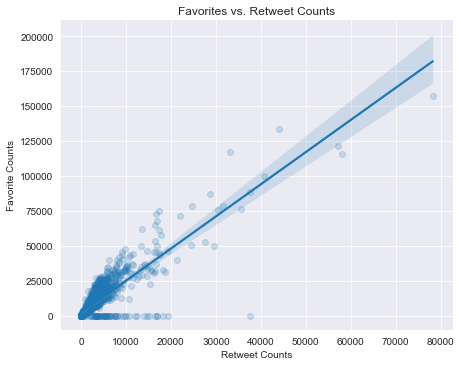

In [172]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", y="favorite_count", data=twitter_cmb, size = 5, aspect=1.3, scatter_kws={'alpha':1/5})
plt.title('Favorites vs. Retweet Counts')
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts');

**2) Popular Dog names**

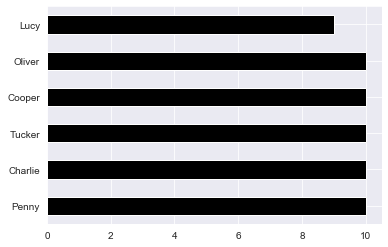

In [173]:
twitter_cmb['name'].value_counts()[1:7].plot(kind='barh', color='#000000');

**3) From 2016 the visual tread of tweets over time**

In [175]:
twitter_cmb.timestamp = pd.to_datetime(twitter_cmb['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = twitter_cmb.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    2059
dtype: int64

In [177]:
import datetime

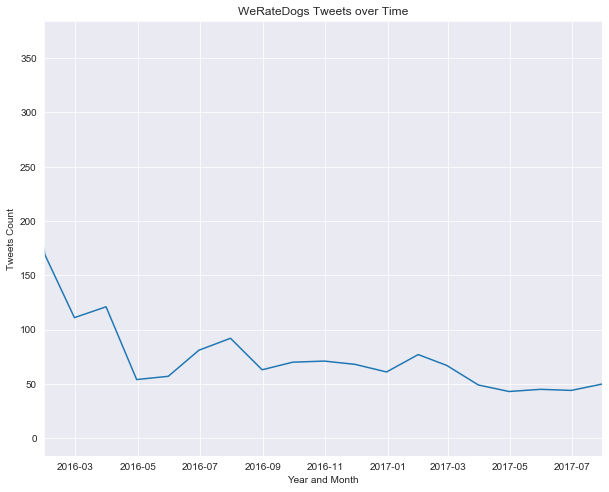

In [182]:
plt.figure(figsize=(10, 8))
plt.xlim([datetime.date(2016, 1, 30), datetime.date(2017, 7, 30)]) 

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('WeRateDogs Tweets over Time');

# Resources

>1) https://www.youtube.com/watch?v=cKlnR-CB3tk
>
>2) https://stackoverflow.com/questions/24619145/rename-none-value-in-pandas
>
>3) https://stackoverflow.com/questions/9012008/pythons-re-return-true-if-string-contains-regex-pattern?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa